In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

import scipy
from scipy import stats

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
address = '//prc-cs-f9dkb42/ecozzolino$/Desktop/code/nolabblistings.csv'
nola = pd.read_csv(address)

In [3]:
print(nola.head(10))
print(nola.describe())

    room_id   host_id        room_type  borough                neighborhood  \
0   2359037   1890423     Private room      NaN                    MID-CITY   
1   5046800   6489256  Entire home/apt      NaN   CENTRAL BUSINESS DISTRICT   
2   7176785   3946277     Private room      NaN               IRISH CHANNEL   
3   9899026  50277968  Entire home/apt      NaN                SEVENTH WARD   
4  11064920  15562279  Entire home/apt      NaN   CENTRAL BUSINESS DISTRICT   
5  10944415  37409832  Entire home/apt      NaN                    MID-CITY   
6   8196597    921339     Private room      NaN  LEONIDAS - WEST CARROLLTON   
7  11039704  17382242     Private room      NaN     CENTRAL CITY - MAGNOLIA   
8   4899348  25013366  Entire home/apt      NaN                 VIEUX CARRE   
9   5568527  28869577     Private room      NaN               ALGIERS POINT   

   reviews  overall_satisfaction  accommodates  bedrooms  price  minstay  \
0       61                   5.0             4       1

In [4]:
rcParams['figure.figsize'] = 5, 4 #this is the size of the plot
sb.set_style('whitegrid') #this is the style: white grid

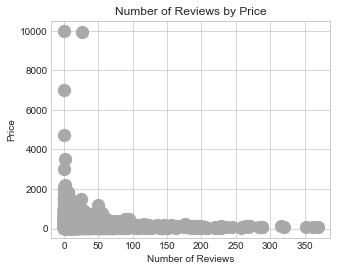

In [5]:
nola.plot(kind='scatter', x='reviews', y='price', c=['darkgray'], s=150)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Number of Reviews by Price')
plt.show()

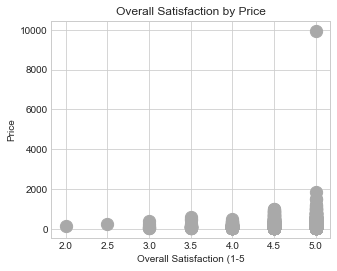

In [6]:
nola.plot(kind='scatter', x='overall_satisfaction', y='price', c=['darkgray'], s=150)
plt.xlabel('Overall Satisfaction (1-5')
plt.ylabel('Price')
plt.title('Overall Satisfaction by Price')
plt.show()

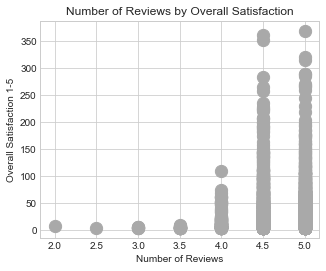

In [7]:
nola.plot(kind='scatter', x='overall_satisfaction', y='reviews', c=['darkgray'], s=150)
plt.xlabel('Number of Reviews')
plt.ylabel('Overall Satisfaction 1-5')
plt.title('Number of Reviews by Overall Satisfaction')
plt.show()

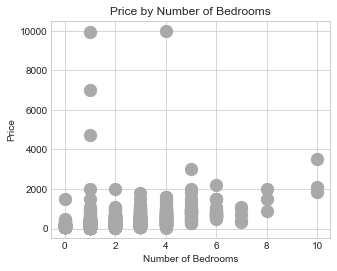

In [8]:
nola.plot(kind='scatter', x='bedrooms', y='price', c=['darkgray'], s=150)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price by Number of Bedrooms')
plt.show()

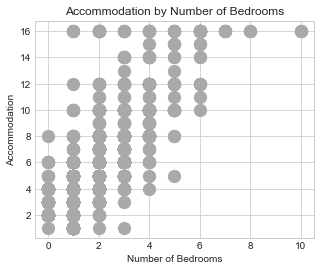

In [9]:
nola.plot(kind='scatter', x='bedrooms', y='accommodates', c=['darkgray'], s=150)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Accommodation')
plt.title('Accommodation by Number of Bedrooms')
plt.show()

In [10]:
nola_trim = nola[['reviews', 'price', 'overall_satisfaction', 'bedrooms', 'accommodates', 'minstay', 'room_type']]
#create dataframe for only focal vars

In [11]:
print(nola_trim.head(10))
print(nola_trim.describe())
#look at new dataset

   reviews  price  overall_satisfaction  bedrooms  accommodates  minstay  \
0       61     91                   5.0       1.0             4      1.0   
1        1    299                   NaN       1.0             4      3.0   
2        8     66                   5.0       1.0             2      1.0   
3        7    115                   4.5       1.0             4      2.0   
4        0   4750                   NaN       1.0             3      1.0   
5        6     99                   4.0       1.0             2      1.0   
6        6     49                   4.5       1.0             2      2.0   
7       17    110                   5.0       1.0             2      1.0   
8       40    225                   4.5       1.0             4      2.0   
9        0    150                   NaN       1.0             2      2.0   

         room_type  
0     Private room  
1  Entire home/apt  
2     Private room  
3  Entire home/apt  
4  Entire home/apt  
5  Entire home/apt  
6     Private ro

In [12]:
nola_trim.isnull().any()
#satisfaction, bedrooms, minstay have missing

reviews                 False
price                   False
overall_satisfaction     True
bedrooms                 True
accommodates            False
minstay                  True
room_type               False
dtype: bool

In [13]:
miss = nola_trim.isnull()
miss.head(10)

reviews  price  overall_satisfaction  bedrooms  accommodates  minstay  \
0       False  False                 False     False         False    False   
1       False  False                  True     False         False    False   
2       False  False                 False     False         False    False   
3       False  False                 False     False         False    False   
4       False  False                  True     False         False    False   
5       False  False                 False     False         False    False   
6       False  False                 False     False         False    False   
7       False  False                 False     False         False    False   
8       False  False                 False     False         False    False   
9       False  False                  True     False         False    False   
10      False  False                 False     False         False    False   
11      False  False                 False     False         False    False   
12      False  False                  True     False         False    False   
13      False  False                 False     False         False    False   
14      False  False                 False     False         False    False   
15      False  False                 False     False         False    False   
16      False  False                 False     False         False    False   
17      False  False                  True     False         False    False   
18      False  False                 False     False         False    False   
19      False  False                 False     False         False    False   
20      False  False                 False     False         False    False   
21      False  False                 False     False         False    False   
22      False  False                 False     False         False    False   
23      False  False                  True     False         False     True   
24      False  False                 False     False         False    False   
25      False  False                 False     False         False    False   
26      False  False                  True     False         False    False   
27      False  False                  True     False         False    False   
28      False  False                 False     False         False    False   
29      False  False                 False     False         False    False   
...       ...    ...                   ...       ...           ...      ...   
4147    False  False                 False     False         False    False   
4148    False  False                 False     False         False    False   
4149    False  False                  True     False         False    False   
4150    False  False                 False     False         False     True   
4151    False  False                 False     False         False    False   
4152    False  False                 False     False         False    False   
4153    False  False                 False     False         False    False   
4154    False  False                 False     False         False    False   
4155    False  False                  True     False         False    False   
4156    False  False                  True     False         False    False   
4157    False  False                  True     False         False    False   
4158    False  False                  True     False         False    False   
4159    False  False                 False     False         False    False   
4160    False  False                  True     False         False    False   
4161    False  False                  True     False         False    False   
4162    False  False                  True     False         False    False   
4163    False  False                 False     False         False    False   
4164    False  False                 False     False         False    False   
4165    False  False                 False     False    

In [14]:
def reject_outliers(nola_trim, m =2.):
    d = np.abs(nola_trim - np.median(nola_trim))
    mdev = np.median(d)
    s = d/mdev if mdev else 0
    return nola_trim[s>m]
nola_trim.head(10)
#this doesn't work.

reviews  price  overall_satisfaction  bedrooms  accommodates  minstay  \
0          61     91                   5.0       1.0             4      1.0   
1           1    299                   NaN       1.0             4      3.0   
2           8     66                   5.0       1.0             2      1.0   
3           7    115                   4.5       1.0             4      2.0   
4           0   4750                   NaN       1.0             3      1.0   
5           6     99                   4.0       1.0             2      1.0   
6           6     49                   4.5       1.0             2      2.0   
7          17    110                   5.0       1.0             2      1.0   
8          40    225                   4.5       1.0             4      2.0   
9           0    150                   NaN       1.0             2      2.0   
10         96     99                   4.5       1.0             4      3.0   
11         49   1200                   5.0       4.0            10      2.0   
12          1     60                   NaN       1.0             2      2.0   
13         95     60                   4.5       1.0             2      2.0   
14          4    225                   5.0       1.0             2      2.0   
15         11     65                   5.0       1.0             2      2.0   
16          5    140                   5.0       1.0             4      2.0   
17          1    125                   NaN       1.0             2      3.0   
18         10    100                   5.0       1.0             4      1.0   
19          3    120                   5.0       1.0             2      2.0   
20         19     65                   4.5       1.0             2      1.0   
21          5    120                   5.0       1.0             4      4.0   
22         24     95                   5.0       2.0             4      1.0   
23          1    150                   NaN       2.0             4      NaN   
24         16    149                   4.5       0.0             2      1.0   
25        285     95                   5.0       1.0             2      1.0   
26          2    150                   NaN       1.0             3      1.0   
27          0    100                   NaN       1.0             4      3.0   
28        152    129                   5.0       2.0             6      3.0   
29          3     85                   4.5       1.0             4      1.0   
...       ...    ...                   ...       ...           ...      ...   
4147        3     79                   4.5       1.0             4      1.0   
4148       14     90                   4.5       1.0             4      1.0   
4149        0    145                   NaN       1.0             2      2.0   
4150        6     80                   4.5       1.0             2      NaN   
4151       33     50                   5.0       1.0             1      1.0   
4152        4    120                   5.0       1.0             2      2.0   
4153       22     45                   4.5       1.0             4      2.0   
4154       19     50                   4.5       1.0             2      1.0   
4155        0     45                   NaN       1.0             2      1.0   
4156        0    100                   NaN       1.0             2      2.0   
4157        0    295                   NaN       1.0             1      1.0   
4158        0     70                   NaN       1.0             4      1.0   
4159        6     50                   5.0       1.0             2      1.0   
4160        1     60                   NaN       1.0             2      1.0   
4161        2     65                   NaN       1.0             5      1.0   
4162        1     60                   NaN       1.0             2      3.0   
4163       18     40                   4.0       1.0             2      1.0   
4164        8     45                   5.0       1.0             2      2.0   
4165       96     60                   4.5       1.0    

In [15]:
    nola_nomiss = nola_trim.dropna()
    print(nola_nomiss.head(10))
    #drop missing values
    nola_nomiss.head(10)

    reviews  price  overall_satisfaction  bedrooms  accommodates  minstay  \
0        61     91                   5.0       1.0             4      1.0   
2         8     66                   5.0       1.0             2      1.0   
3         7    115                   4.5       1.0             4      2.0   
5         6     99                   4.0       1.0             2      1.0   
6         6     49                   4.5       1.0             2      2.0   
7        17    110                   5.0       1.0             2      1.0   
8        40    225                   4.5       1.0             4      2.0   
10       96     99                   4.5       1.0             4      3.0   
11       49   1200                   5.0       4.0            10      2.0   
13       95     60                   4.5       1.0             2      2.0   

          room_type  
0      Private room  
2      Private room  
3   Entire home/apt  
5   Entire home/apt  
6      Private room  
7      Private room 

reviews  price  overall_satisfaction  bedrooms  accommodates  minstay  \
0          61     91                   5.0       1.0             4      1.0   
2           8     66                   5.0       1.0             2      1.0   
3           7    115                   4.5       1.0             4      2.0   
5           6     99                   4.0       1.0             2      1.0   
6           6     49                   4.5       1.0             2      2.0   
7          17    110                   5.0       1.0             2      1.0   
8          40    225                   4.5       1.0             4      2.0   
10         96     99                   4.5       1.0             4      3.0   
11         49   1200                   5.0       4.0            10      2.0   
13         95     60                   4.5       1.0             2      2.0   
14          4    225                   5.0       1.0             2      2.0   
15         11     65                   5.0       1.0             2      2.0   
16          5    140                   5.0       1.0             4      2.0   
18         10    100                   5.0       1.0             4      1.0   
19          3    120                   5.0       1.0             2      2.0   
20         19     65                   4.5       1.0             2      1.0   
21          5    120                   5.0       1.0             4      4.0   
22         24     95                   5.0       2.0             4      1.0   
24         16    149                   4.5       0.0             2      1.0   
25        285     95                   5.0       1.0             2      1.0   
28        152    129                   5.0       2.0             6      3.0   
29          3     85                   4.5       1.0             4      1.0   
31         22     75                   5.0       1.0             2      2.0   
32         10     75                   5.0       1.0             2      1.0   
34         31    115                   5.0       0.0             2      3.0   
36         99    170                   5.0       2.0             5      2.0   
37         61    200                   4.5       1.0             2      2.0   
39          3     99                   5.0       1.0             5      1.0   
40         10    200                   5.0       2.0             6      1.0   
41          8    200                   5.0       1.0             2      2.0   
...       ...    ...                   ...       ...           ...      ...   
4127       32     89                   4.5       1.0             2      1.0   
4128        5    110                   4.5       1.0             2      2.0   
4131       12     55                   4.0       1.0             4      1.0   
4133      188     60                   4.5       1.0             2      1.0   
4135      105     50                   5.0       1.0             2      2.0   
4137        6    150                   4.5       1.0             2      2.0   
4138       33     55                   4.0       1.0             2      1.0   
4141        3     34                   4.5       1.0             1      1.0   
4142       53     70                   5.0       1.0             2      3.0   
4143       42     98                   4.5       1.0             2      1.0   
4144       84     64                   4.5       1.0             2      2.0   
4145       49     65                   5.0       1.0             3      1.0   
4147        3     79                   4.5       1.0             4      1.0   
4148       14     90                   4.5       1.0             4      1.0   
4151       33     50                   5.0       1.0             1      1.0   
4152        4    120                   5.0       1.0             2      2.0   
4153       22     45                   4.5       1.0             4      2.0   
4154       19     50                   4.5       1.0             2      1.0   
4159        6     50                   5.0       1.0    

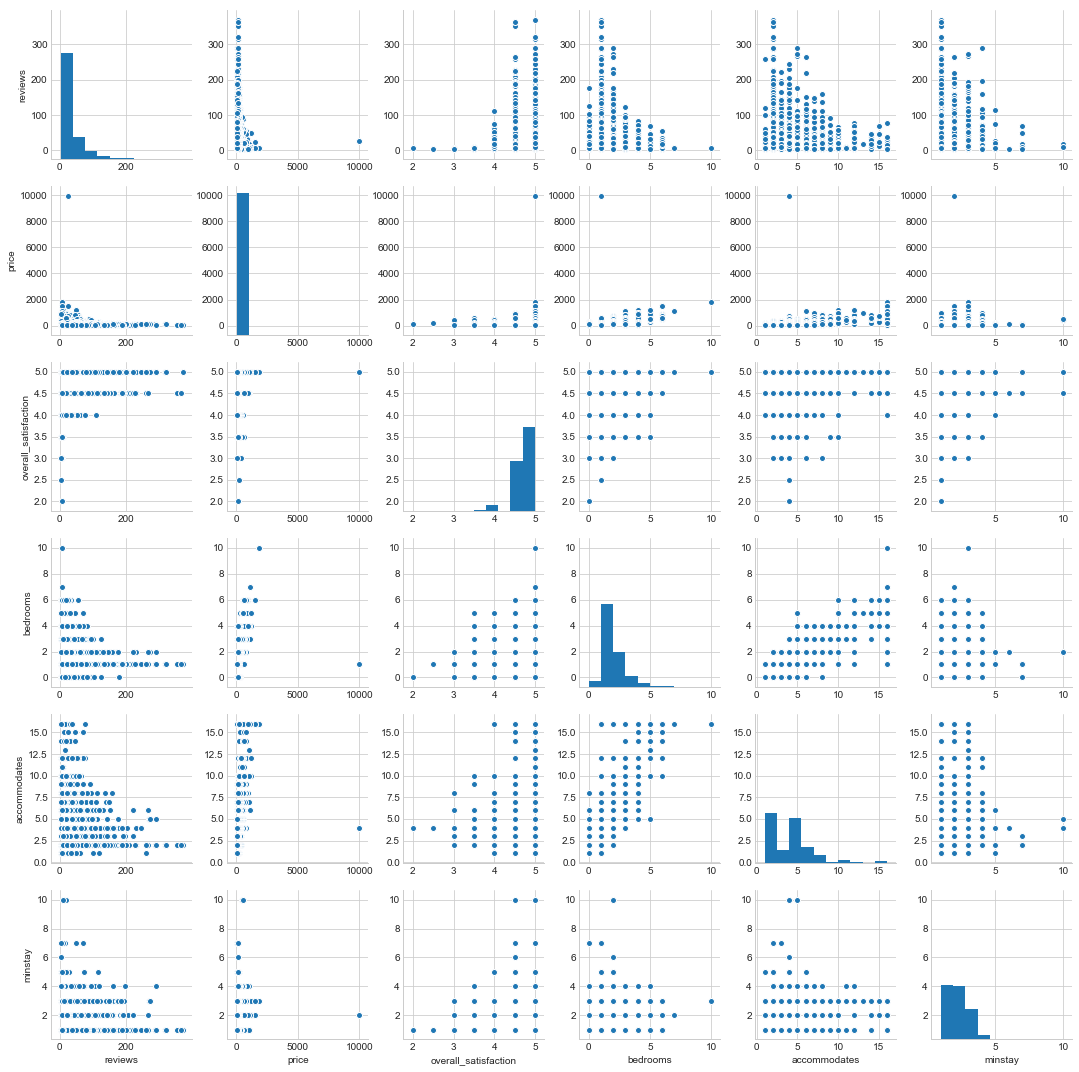

In [16]:
X = nola_nomiss[['reviews', 'price', 'overall_satisfaction', 'bedrooms', 'accommodates', 'minstay', 'room_type']]
sb.pairplot(X)
plt.show()

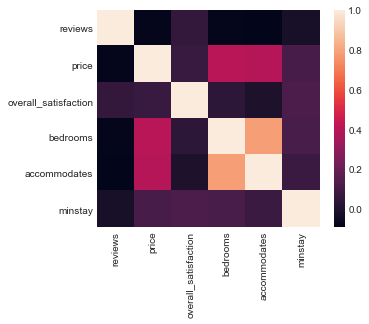

In [17]:
corr = X.corr()
corr
sb.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [18]:
pearsonr_coefficient, p_value = pearsonr(nola_nomiss.reviews, nola_nomiss.price)
print('PearsonR Correlation Coefficient - Reviews, Price %0.3f' % (pearsonr_coefficient))

pearsonr_coefficient, p_value = pearsonr(nola_nomiss.accommodates, nola_nomiss.price)
print('PearsonR Correlation Coefficient - Accommodates, Price %0.3f' % (pearsonr_coefficient))

table = pd.crosstab(nola_nomiss.room_type, nola_nomiss.overall_satisfaction)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic - Room Type, Overall Satisfaction %0.3f p_value %0.3f' % (chi2, p))

table = pd.crosstab(nola_nomiss.room_type, nola_nomiss.price)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic - Room Type, Price %0.3f p_value %0.3f' % (chi2, p))

PearsonR Correlation Coefficient - Reviews, Price -0.082
PearsonR Correlation Coefficient - Accommodates, Price 0.395
Chi-square Statistic - Room Type, Overall Satisfaction 53.104 p_value 0.000
Chi-square Statistic - Room Type, Price 1842.816 p_value 0.000


In [20]:
nola_bin = pd.get_dummies(nola_nomiss['room_type'])
nolaBinNomiss = pd.concat([nola_nomiss, nola_bin], axis=1)
nolaBinNomiss.head(10)

reviews  price  overall_satisfaction  bedrooms  accommodates  minstay  \
0          61     91                   5.0       1.0             4      1.0   
2           8     66                   5.0       1.0             2      1.0   
3           7    115                   4.5       1.0             4      2.0   
5           6     99                   4.0       1.0             2      1.0   
6           6     49                   4.5       1.0             2      2.0   
7          17    110                   5.0       1.0             2      1.0   
8          40    225                   4.5       1.0             4      2.0   
10         96     99                   4.5       1.0             4      3.0   
11         49   1200                   5.0       4.0            10      2.0   
13         95     60                   4.5       1.0             2      2.0   
14          4    225                   5.0       1.0             2      2.0   
15         11     65                   5.0       1.0             2      2.0   
16          5    140                   5.0       1.0             4      2.0   
18         10    100                   5.0       1.0             4      1.0   
19          3    120                   5.0       1.0             2      2.0   
20         19     65                   4.5       1.0             2      1.0   
21          5    120                   5.0       1.0             4      4.0   
22         24     95                   5.0       2.0             4      1.0   
24         16    149                   4.5       0.0             2      1.0   
25        285     95                   5.0       1.0             2      1.0   
28        152    129                   5.0       2.0             6      3.0   
29          3     85                   4.5       1.0             4      1.0   
31         22     75                   5.0       1.0             2      2.0   
32         10     75                   5.0       1.0             2      1.0   
34         31    115                   5.0       0.0             2      3.0   
36         99    170                   5.0       2.0             5      2.0   
37         61    200                   4.5       1.0             2      2.0   
39          3     99                   5.0       1.0             5      1.0   
40         10    200                   5.0       2.0             6      1.0   
41          8    200                   5.0       1.0             2      2.0   
...       ...    ...                   ...       ...           ...      ...   
4127       32     89                   4.5       1.0             2      1.0   
4128        5    110                   4.5       1.0             2      2.0   
4131       12     55                   4.0       1.0             4      1.0   
4133      188     60                   4.5       1.0             2      1.0   
4135      105     50                   5.0       1.0             2      2.0   
4137        6    150                   4.5       1.0             2      2.0   
4138       33     55                   4.0       1.0             2      1.0   
4141        3     34                   4.5       1.0             1      1.0   
4142       53     70                   5.0       1.0             2      3.0   
4143       42     98                   4.5       1.0             2      1.0   
4144       84     64                   4.5       1.0             2      2.0   
4145       49     65                   5.0       1.0             3      1.0   
4147        3     79                   4.5       1.0             4      1.0   
4148       14     90                   4.5       1.0             4      1.0   
4151       33     50                   5.0       1.0             1      1.0   
4152        4    120                   5.0       1.0             2      2.0   
4153       22     45                   4.5       1.0             4      2.0   
4154       19     50                   4.5       1.0             2      1.0   
4159        6     50                   5.0       1.0    

In [ ]:
y = nolaBinNomiss.price
#X = nola_nomiss.drop('price', axis=1)
X = nolaBinNomiss[['reviews', 'overall_satisfaction', 'bedrooms', 'accommodates', 'minstay', 'Private room', 'Shared room']]
#create DV and focal IV's for analysis

In [19]:
y.groupby(X.room_type).mean()
#look at means by room type to see if there's natural order to them

NameError: name 'y' is not defined

In [ ]:
#nola_nomiss['roomtypecat'] = pd.Categorical(nola_nomiss.room_type).labels
#this spits out a weird error - Entry point for launching an IPython kernal ?

In [ ]:
np.asarray(nolaBinNomiss)

In [ ]:
results = sm.OLS(y, X).fit()
results.summary()

In [ ]:
X
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=1/3,
                                                        random_state=123)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

In [ ]:
pipeline=make_pipeline(preprocessing.StandardScaler(),
                                        RandomForestRegressor(n_estimators=100))
#print(pipeline.get_params())
#create pipeline for evaluating models

In [ ]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                                    'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [ ]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)

In [ ]:
print(clf.best_params_)
#discover which parameters are best for these data
print(clf.refit)
#refit on the training set

In [ ]:
y_pred = clf.predict(X_test)
#predict a new set of data
print(r2_score(y_test, y_pred))
# r2: 0.5676
#much better model once accounting for bedrooms, accommedations
print(mean_squared_error(y_test, y_pred))
# mse: 13730.57

In [ ]:
#save the model for reuse later
joblib.dump(clf, 'rf_regressor.pkl')
clf2 =joblib.load('rf_regressor.pkl')
clf2.predict(X_test)